Hyperspectral Analysis for Vomitoxin Prediction

---



In [9]:
import pandas as pd
corn=pd.read_csv("/content/TASK-ML-INTERN.csv")

In [10]:
corn.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [11]:
missing_values = corn.isnull().sum()
missing_values

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


In [12]:
summary_stats = corn.describe()
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


Data Description
---
Total Records: 500

Total Features: 449 (excluding the hsi_id column)

Target Variable: vomitoxin_ppb

Feature Types: All numerical values

Missing Values: None found

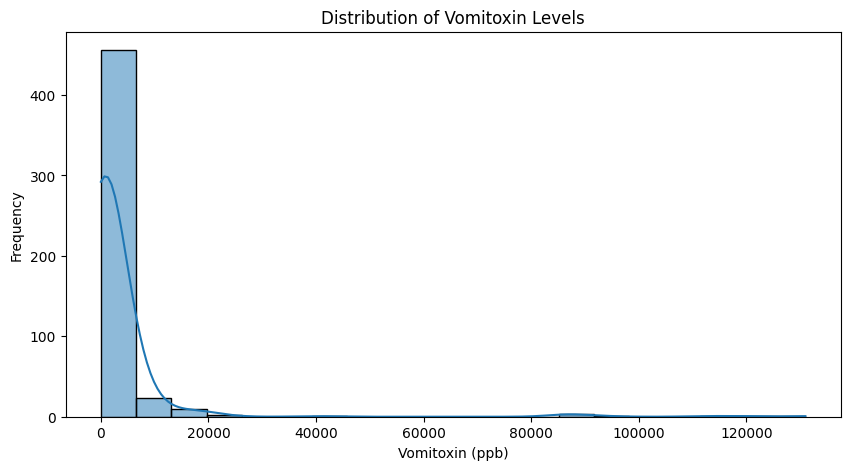

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(corn["vomitoxin_ppb"], bins=20, kde=True)
plt.xlabel("Vomitoxin (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels")
plt.show()


The data is right skewed.

we cannot remove outliers as it might be true values as well.

we can use tree based models(Random forest) since it is robust to outliers and its a parametric method and we can apply log transformation as target values vary by orders of magnitude, applying a log transform can help a model focus on relative differences.

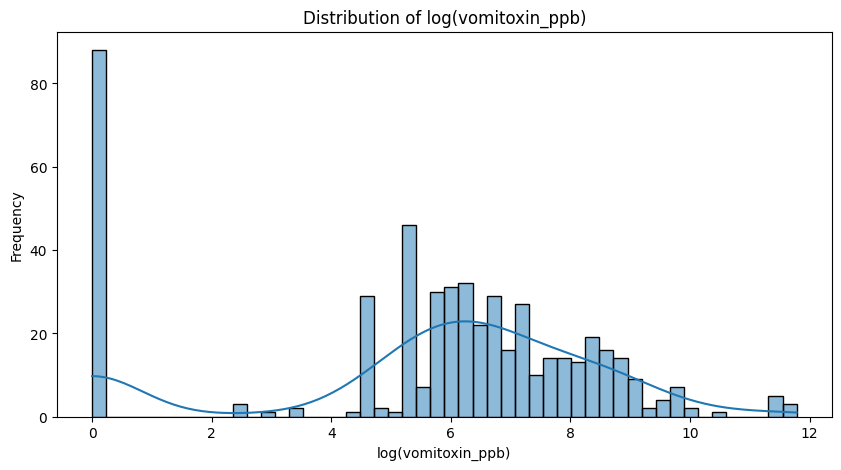

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation using np.log1p to handle zeros (i.e., log(1+x))
corn['log_vomitoxin_ppb'] = np.log1p(corn['vomitoxin_ppb'])

# Plot the distribution of the log-transformed target variable
plt.figure(figsize=(10, 5))
sns.histplot(corn['log_vomitoxin_ppb'], bins=50, kde=True)
plt.xlabel("log(vomitoxin_ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of log(vomitoxin_ppb)")
plt.show()

In [15]:
corn1 = corn.drop("hsi_id", axis=1)
correlation_matrix = corn1.corr()
target_correlation = correlation_matrix["vomitoxin_ppb"].sort_values(ascending=False)

# Display the top 10 most correlated features
target_correlation.head(11)

,vomitoxin_ppb
vomitoxin_ppb,1.000000
log_vomitoxin_ppb,0.387445
71,0.104296
67,0.096542
70,0.095694
48,0.092803
50,0.092493
47,0.090392
69,0.089803
64,0.088663


The top 10 features with the highest correlation to vomitoxin_ppb have relatively weak correlations (below 0.11), suggesting that no single feature is strongly predictive. This might indicate the need for:

Feature Engineering or
Dimensionality Reduction (e.g., PCA) to extract meaningful patterns.

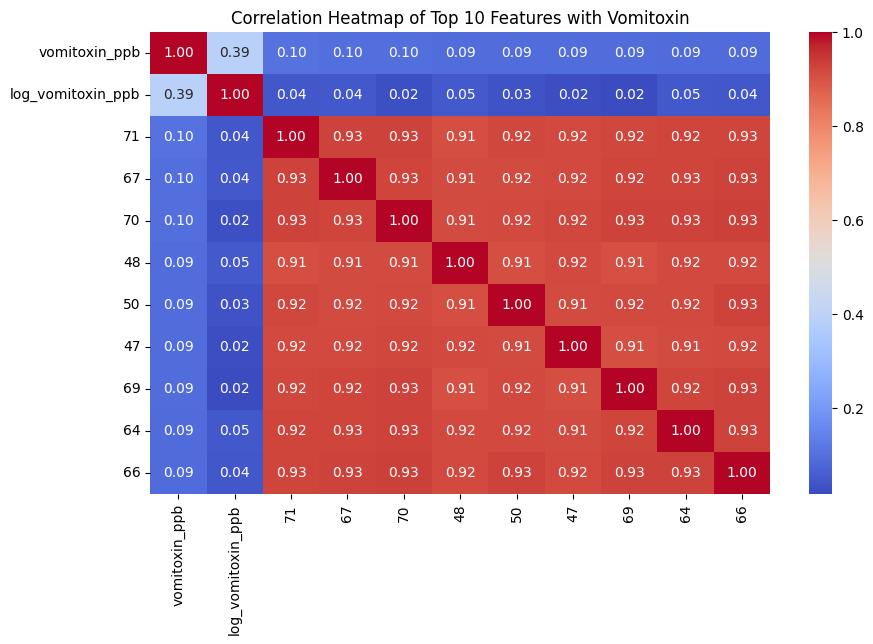

In [16]:
top_features = target_correlation.head(11).index

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corn1[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top 10 Features with Vomitoxin")
plt.show()

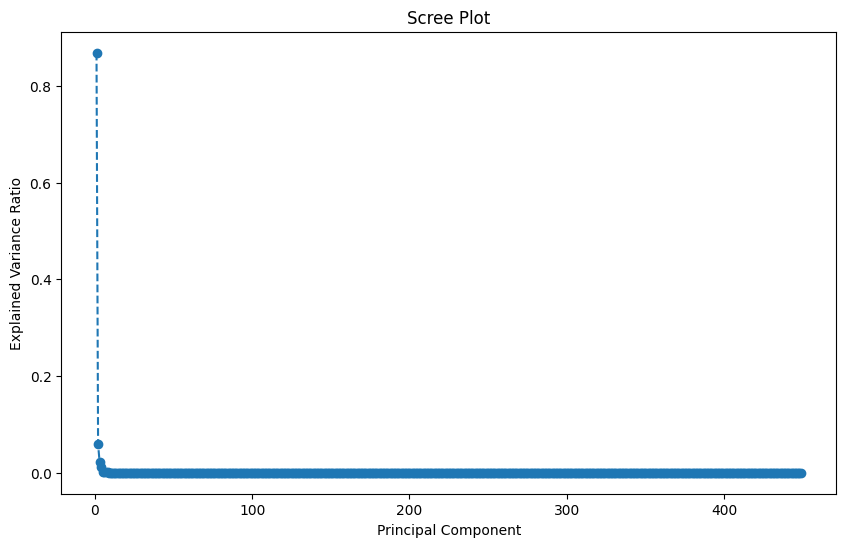

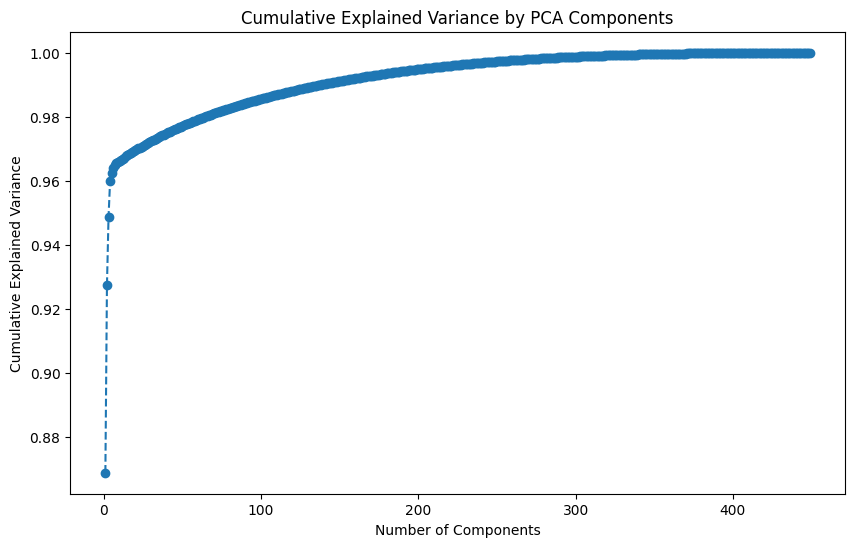

Number of components to explain 97% of the variance: 22


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop the identifier and target variable
features = corn.drop(columns=['hsi_id', 'vomitoxin_ppb'])

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Scree Plot: Explained variance per component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()

# Determine number of components to explain 96.5% of the variance
n_components_97 = (cumulative_variance >= 0.97).argmax() + 1
print("Number of components to explain 97% of the variance:", n_components_97)

The plot shows how much of the total variance in the data is captured as we add more principal components. Initially, the curve rises steeply, indicating that a few components capture a large portion of the variance quickly. After the initial jump, the curve starts to flatten, meaning additional components only marginally increase the total explained variance.

By looking at the point where the curve crosses a chosen threshold (like 95% or 99% explained variance), we can decide how many components to keep. In this example, it is seen that the cumulative variance surpasses 95% at a relatively low number of components, well before reaching the total of 448 components.

This reduction in dimensionality can help simplify the model without sacrificing too much information.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'corn', 'features_scaled', 'pca', and 'n_components_97' are defined from the previous code

# Apply PCA with the selected number of components
pca_final = PCA(n_components=n_components_97)
X_pca = pca_final.fit_transform(features_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, corn['log_vomitoxin_ppb'], test_size=0.2, random_state=42)

# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Root mean Square: {rmse}")

Mean Squared Error: 0.8399859783679582
R-squared: 0.8965325452484307
Root mean Square: 0.9165074895318412


Visualisation of Actual vs Log transformed vomitoxin

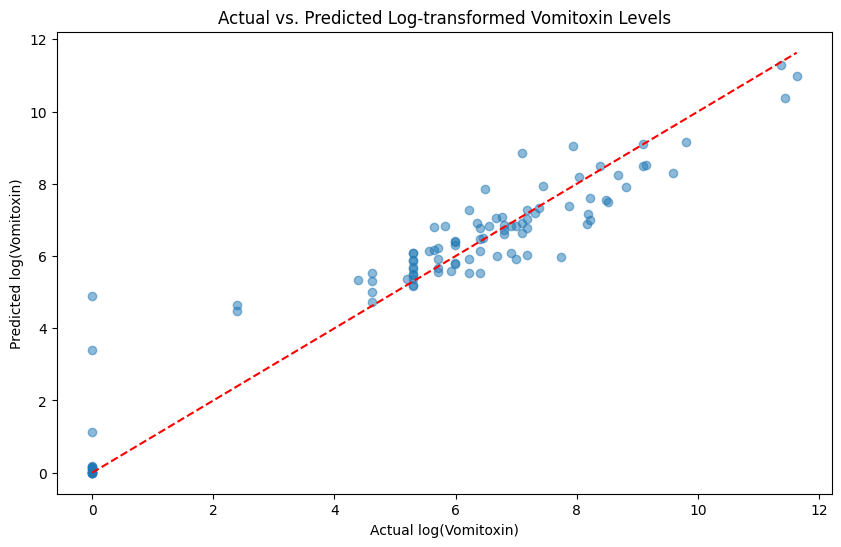

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual log(Vomitoxin)")
plt.ylabel("Predicted log(Vomitoxin)")
plt.title("Actual vs. Predicted Log-transformed Vomitoxin Levels")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()


This scatter plot compares actual and predicted log-transformed vomitoxin levels. The red dashed line represents the ideal y = x relationship. Most points align well with this line, showing a reasonably accurate model, while deviations indicate prediction errors.